In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


49.01819134004339 85.2050118196056
1.8337666631239244 33.59197444516852
14.698653523402015 109.45983124466414
49.43737340294223 107.15560173489439
22.716459565785485 -95.63182090343551
71.42353964933142 62.91962203044716
5.408986597436879 28.68870743398233
4.642836580577992 50.050428429753396
72.32295984112102 -40.625153522996754
-85.14682641201689 -166.20273720218012
30.544416466645913 149.44170190956345
88.43708589025229 58.14100236744784
19.42170459998077 62.03768000400194
22.516334439524456 -45.936023366333615
-85.18498819712622 85.48868635149682
-2.548801312300597 -158.46011035504293
32.033986863107415 -176.81202271395264
-88.1982440776987 110.89819410519902
50.8350600470481 114.20991956379305
17.366481720701245 38.20182840379016
18.75072330838286 126.60224770326562
63.97250596095745 25.90524852033309
-17.30041003917877 -139.26677740688575
69.70275352868333 -35.16142569260222
-12.233019590698333 91.14388649814907
-85.44272259622251 -26.87497207010105
31.914209730471867 -46.0098990

-41.69527480998884 56.99116034945618
-21.240187018929788 75.81932303091867
15.208371457880503 -68.56547747381202
54.61674178003071 130.17927844154156
56.37441536577131 -169.4343849770004
-60.0294948021372 95.48731844473315
-34.15420230732932 -147.15455239928957
25.69743593799201 67.01423105779963
17.322036394072384 -50.824880966006845
60.554013556160214 126.64268244081654
51.71028029390726 28.14656975185204
-66.50351124363544 31.03967662752524
2.1700018867933863 125.73931601495218
-43.940836454300296 -73.31167012620051
-44.44826930165965 47.726909370334056
-9.654962392660494 -58.5521059576663
59.37919570035626 56.31127069523262
23.81663966426474 9.83785582585864
45.61744797937595 87.1923224666786
-39.755510807966495 -149.92629327177923
31.955553327070774 -57.793378820759116
22.46940772460499 2.181279711396172
-56.55717103040367 89.10957010359465
81.53213777460454 142.65102019542024
-74.21392169605964 -94.37267681615978
-60.490388357223935 -162.07172986206228
-57.532438629176326 -55.976

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ee1dcefdf5bc3590ef229d91dec76318


In [7]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
      #  set_count += 1
       # record_count = 1
      # time.sleep(60)

# Create endpoint URL with each city.
  #  city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | zyryanovsk
Processing Record 2 of Set 1 | soroti
Processing Record 3 of Set 1 | quang ngai
Processing Record 4 of Set 1 | chikoy
City not found. Skipping...
Processing Record 5 of Set 1 | miramar
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | yambio
Processing Record 8 of Set 1 | hobyo
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | sur
Processing Record 14 of Set 1 | bathsheba
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | aginskoye
Processing Record 20 of Set 1 | tawkar
City not found. Skipping...
Processing Record 21 of Set 1 | san vicente
Processing Record 22 of Set 1 | muhos
Processing 

Processing Record 36 of Set 4 | lagoa
Processing Record 37 of Set 4 | sisimiut
Processing Record 38 of Set 4 | avera
Processing Record 39 of Set 4 | goderich
Processing Record 40 of Set 4 | labutta
City not found. Skipping...
Processing Record 41 of Set 4 | yanchukan
City not found. Skipping...
Processing Record 42 of Set 4 | hithadhoo
Processing Record 43 of Set 4 | saint george
Processing Record 44 of Set 4 | beringovskiy
Processing Record 45 of Set 4 | vaini
Processing Record 46 of Set 4 | gaoua
Processing Record 47 of Set 4 | manuk mangkaw
Processing Record 48 of Set 4 | fortuna
Processing Record 49 of Set 4 | souillac
Processing Record 50 of Set 4 | ashqelon
Processing Record 1 of Set 5 | kenai
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | rawson
Processing Record 4 of Set 5 | voi
Processing Record 5 of Set 5 | garowe
Processing Record 6 of Set 5 | baykit
Processing Record 7 of Set 5 | adrar
Processing Record 8 of Set 5 | olafsvik
Processing Record 9 of Set 

Processing Record 29 of Set 8 | ilhabela
Processing Record 30 of Set 8 | lata
Processing Record 31 of Set 8 | belmonte
Processing Record 32 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 33 of Set 8 | aberdeen
Processing Record 34 of Set 8 | aflu
City not found. Skipping...
Processing Record 35 of Set 8 | enshi
Processing Record 36 of Set 8 | singaparna
Processing Record 37 of Set 8 | gwadar
Processing Record 38 of Set 8 | twin falls
Processing Record 39 of Set 8 | biscarrosse
Processing Record 40 of Set 8 | porto murtinho
Processing Record 41 of Set 8 | cidreira
Processing Record 42 of Set 8 | surin
Processing Record 43 of Set 8 | numi
City not found. Skipping...
Processing Record 44 of Set 8 | asyut
Processing Record 45 of Set 8 | vanimo
Processing Record 46 of Set 8 | sobolevo
Processing Record 47 of Set 8 | ternate
Processing Record 48 of Set 8 | opuwo
Processing Record 49 of Set 8 | swan river
Processing Record 50 of Set 8 | kahului
Processing Record 1 of Set

Processing Record 18 of Set 12 | kirovskiy
Processing Record 19 of Set 12 | kayes
Processing Record 20 of Set 12 | mayo
Processing Record 21 of Set 12 | karaman
Processing Record 22 of Set 12 | qabis
City not found. Skipping...
Processing Record 23 of Set 12 | kassala
Processing Record 24 of Set 12 | teixeira
Processing Record 25 of Set 12 | port lincoln
Processing Record 26 of Set 12 | fare
Processing Record 27 of Set 12 | raudeberg
Processing Record 28 of Set 12 | flin flon
Processing Record 29 of Set 12 | oksfjord
Processing Record 30 of Set 12 | bairnsdale
Processing Record 31 of Set 12 | jinchang
Processing Record 32 of Set 12 | kazerun
Processing Record 33 of Set 12 | saquena
Processing Record 34 of Set 12 | taksimo
Processing Record 35 of Set 12 | angoche
Processing Record 36 of Set 12 | pahrump
Processing Record 37 of Set 12 | velyka bahachka
Processing Record 38 of Set 12 | lardos
Processing Record 39 of Set 12 | mafinga
Processing Record 40 of Set 12 | xudat
Processing Record

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zyryanovsk,49.7386,84.2719,59.83,54,100,2.21,KZ,2022-07-20 21:59:08
1,Soroti,1.7146,33.6111,64.67,82,78,2.73,UG,2022-07-20 21:59:08
2,Quang Ngai,15.1167,108.8000,75.00,90,55,5.73,VN,2022-07-20 21:54:55
3,Miramar,25.9873,-80.2323,92.01,65,4,5.01,US,2022-07-20 21:59:08
4,Yambio,4.5721,28.3955,66.69,94,46,2.04,SS,2022-07-20 21:59:09
5,Hobyo,5.3505,48.5268,75.29,80,31,25.41,SO,2022-07-20 21:59:09
6,Tasiilaq,65.6145,-37.6368,38.66,81,66,1.19,GL,2022-07-20 21:59:10
7,Mataura,-46.1927,168.8643,40.48,88,100,2.84,NZ,2022-07-20 21:59:10
8,Hasaki,35.7333,140.8333,79.29,79,99,7.49,JP,2022-07-20 21:58:34
9,Sur,22.5667,59.5289,83.57,77,86,15.01,OM,2022-07-20 21:55:34


In [36]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zyryanovsk,KZ,2022-07-20 21:59:08,49.7386,84.2719,59.83,54,100,2.21
1,Soroti,UG,2022-07-20 21:59:08,1.7146,33.6111,64.67,82,78,2.73
2,Quang Ngai,VN,2022-07-20 21:54:55,15.1167,108.8000,75.00,90,55,5.73
3,Miramar,US,2022-07-20 21:59:08,25.9873,-80.2323,92.01,65,4,5.01
4,Yambio,SS,2022-07-20 21:59:09,4.5721,28.3955,66.69,94,46,2.04
5,Hobyo,SO,2022-07-20 21:59:09,5.3505,48.5268,75.29,80,31,25.41
6,Tasiilaq,GL,2022-07-20 21:59:10,65.6145,-37.6368,38.66,81,66,1.19
7,Mataura,NZ,2022-07-20 21:59:10,-46.1927,168.8643,40.48,88,100,2.84
8,Hasaki,JP,2022-07-20 21:58:34,35.7333,140.8333,79.29,79,99,7.49
9,Sur,OM,2022-07-20 21:55:34,22.5667,59.5289,83.57,77,86,15.01


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [39]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today


1658367865.85953

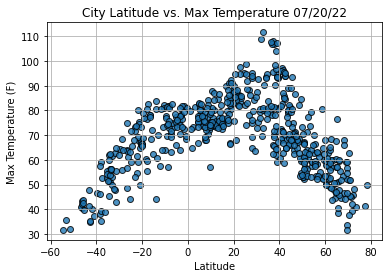

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

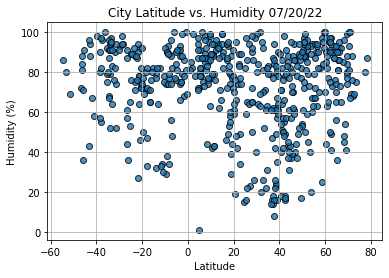

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


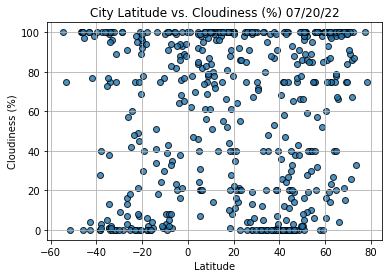

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

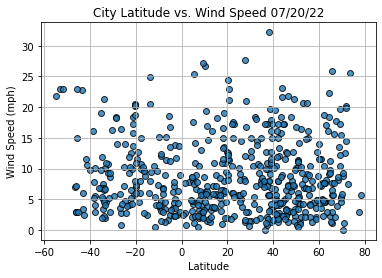

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()